## Analyzing Flights Delay

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flights = pd.DataFrame.from_csv('dataset.csv', sep=',', header=0, index_col=None)

### missing values

In [3]:
flights.apply(lambda x: sum(x.isnull()), axis=0)

FL_DATE                      0
UNIQUE_CARRIER               0
AIRLINE_ID                   0
CARRIER                      0
FL_NUM                       0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN                       0
ORIGIN_CITY_NAME             0
ORIGIN_STATE_ABR             0
ORIGIN_STATE_NM              0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST                         0
DEST_CITY_NAME               0
DEST_STATE_ABR               0
DEST_STATE_NM                0
DEP_TIME                   804
DEP_DELAY                  804
DEP_DELAY_NEW              804
ARR_TIME                   911
ARR_DELAY                 1031
ARR_DELAY_NEW             1031
CANCELLED                    0
CANCELLATION_CODE        99151
DIVERTED                     0
ACTUAL_ELAPSED_TIME       1031
AIR_TIME                  1031
DISTANCE                     0
CARRIER_DELAY            82002
WEATHER_

### fill missing values of different delay types

In [4]:
flights[["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]] = \
flights[["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]].fillna(value=0)

### remove irrelevant flights

In [5]:
flights = flights[(flights.CANCELLED != 1) & (flights.DIVERTED != 1)]

### compute significant delay (delay time duo to significant reasons)

In [6]:
flights["DelayTime"] = flights["CARRIER_DELAY"] + flights["LATE_AIRCRAFT_DELAY"]
flights["DelayTime"] += np.where(flights.DEP_DELAY < 0, np.abs(flights.DEP_DELAY), flights["DelayTime"])

### group by the weighted mean value of delay

In [7]:
grouped_flights = flights.groupby(["UNIQUE_CARRIER"])["DelayTime"].mean().apply(lambda x: x / flights.groupby(["UNIQUE_CARRIER"]).size().sum()*100)

### The airline that is likely the least trustworthy

In [8]:
grouped_flights.idxmax(axis=1)

'VX'

### data of flights that have a positive departure delay

In [9]:
pdd_flights = flights[flights.DEP_DELAY > 0]

### calculate pearson correlation

In [10]:
pearson_correlations_matrix = pdd_flights[["DEP_DELAY","ARR_DELAY","ACTUAL_ELAPSED_TIME","DISTANCE"]].corr(method='pearson')
pearson_correlations_matrix

,DEP_DELAY,ARR_DELAY,ACTUAL_ELAPSED_TIME,DISTANCE
DEP_DELAY,1.000000,0.965819,-0.008494,-0.011871
ARR_DELAY,0.965819,1.000000,-0.040742,-0.072738
ACTUAL_ELAPSED_TIME,-0.008494,-0.040742,1.000000,0.973246
DISTANCE,-0.011871,-0.072738,0.973246,1.000000


### visulaize results

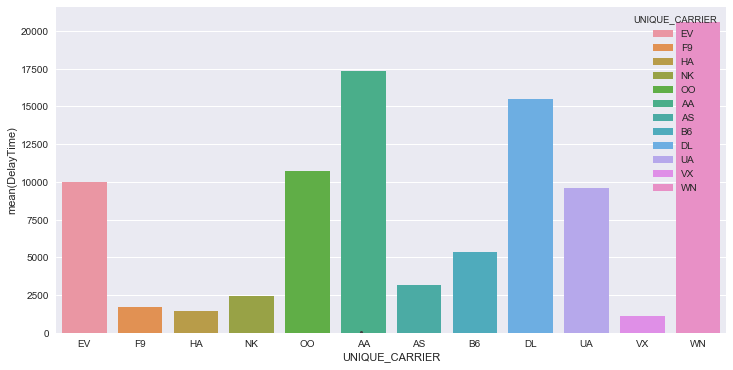

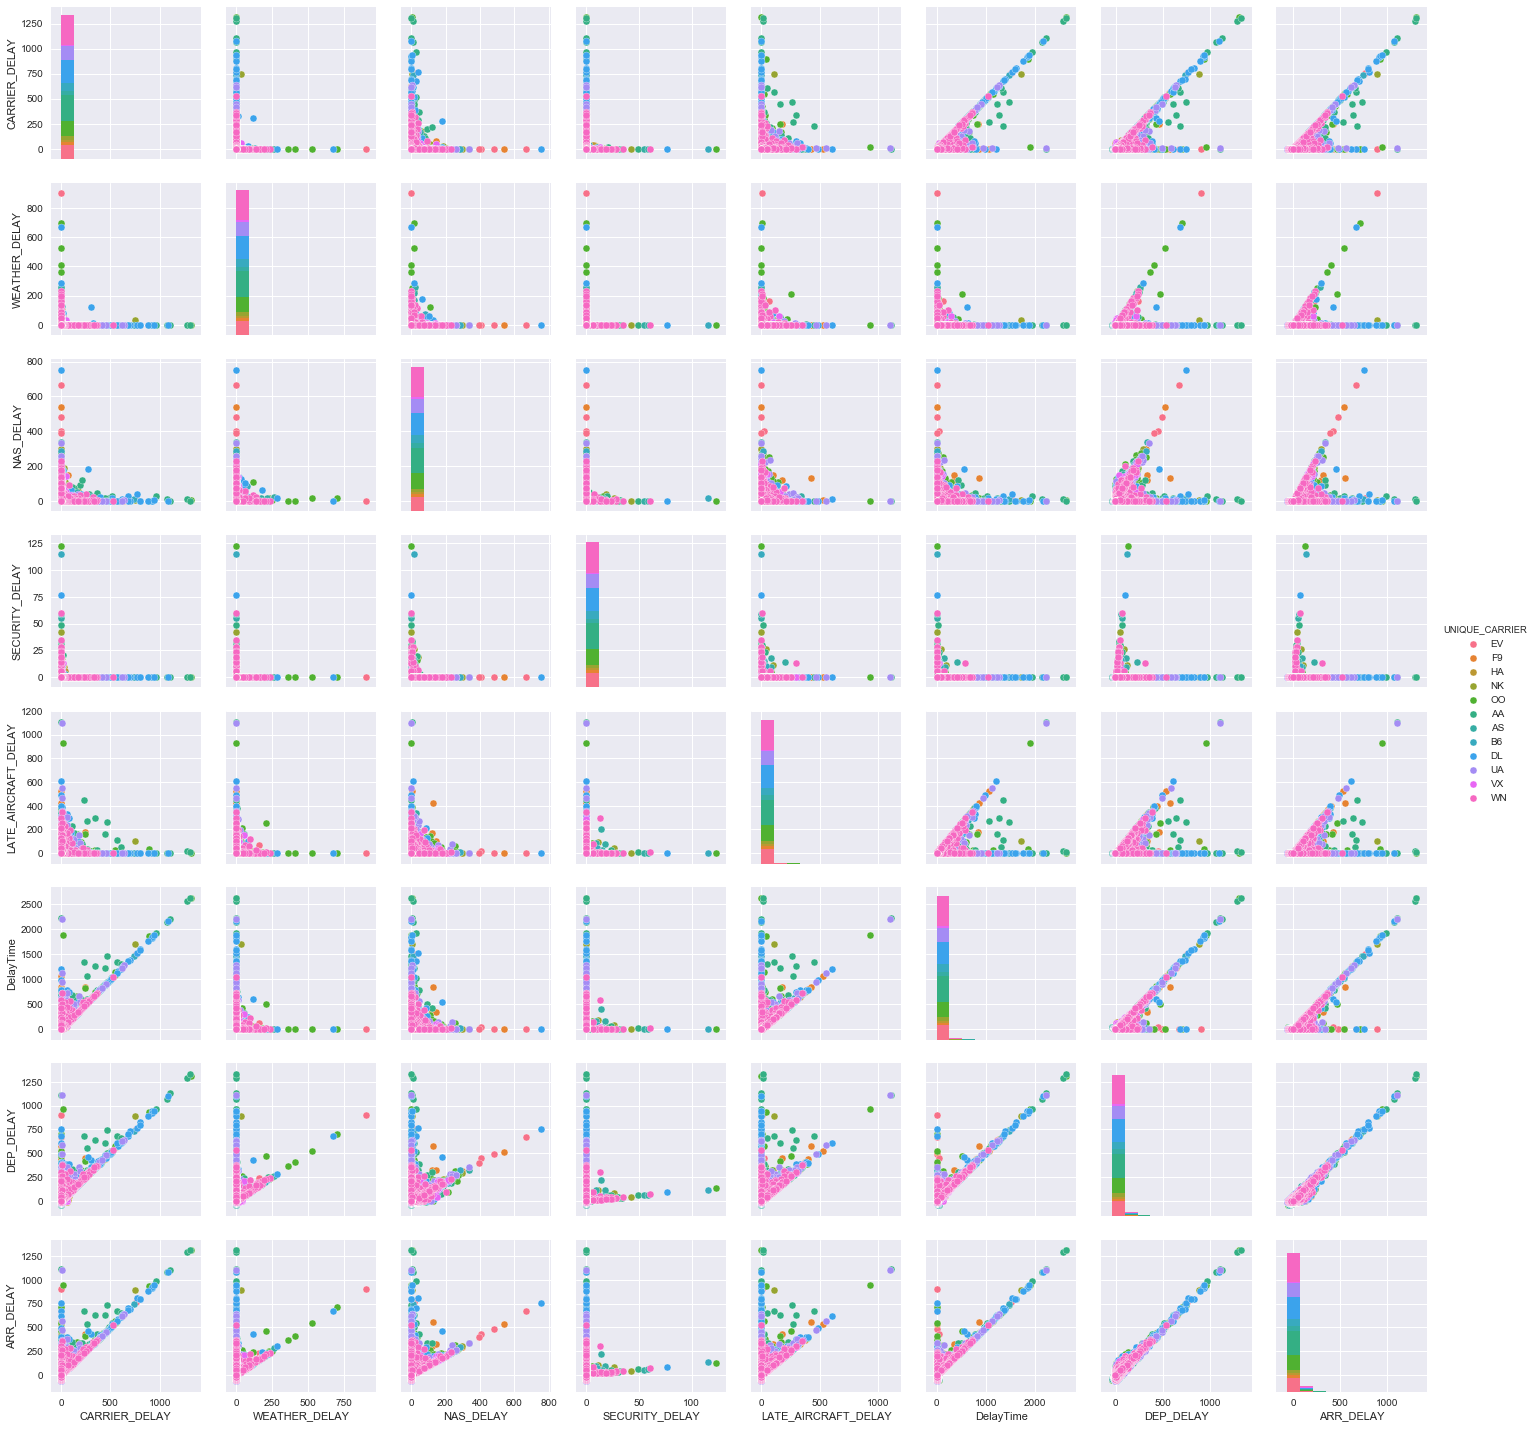

In [11]:
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.countplot(x="UNIQUE_CARRIER", data=flights)
sns.barplot(x="UNIQUE_CARRIER", y="DelayTime", data=flights, hue="UNIQUE_CARRIER", estimator=np.mean)
sns.pairplot(flights[["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
                      "DelayTime", "DEP_DELAY", "ARR_DELAY", "UNIQUE_CARRIER"]], hue="UNIQUE_CARRIER")

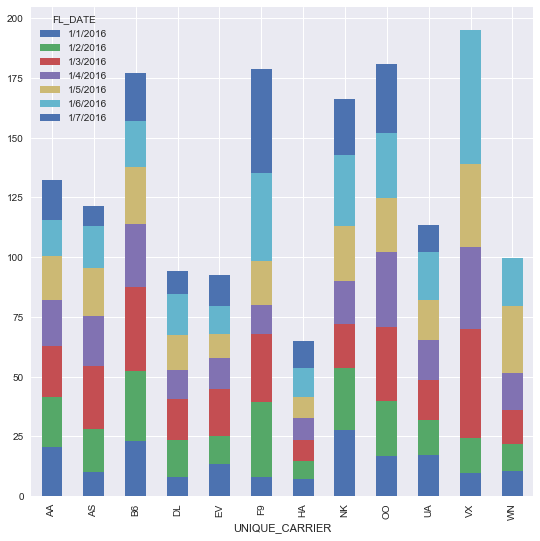

In [12]:
flights.groupby(["UNIQUE_CARRIER", "FL_DATE"])["DelayTime"].mean().unstack().plot(kind="bar", stacked=True, figsize=(9, 9))

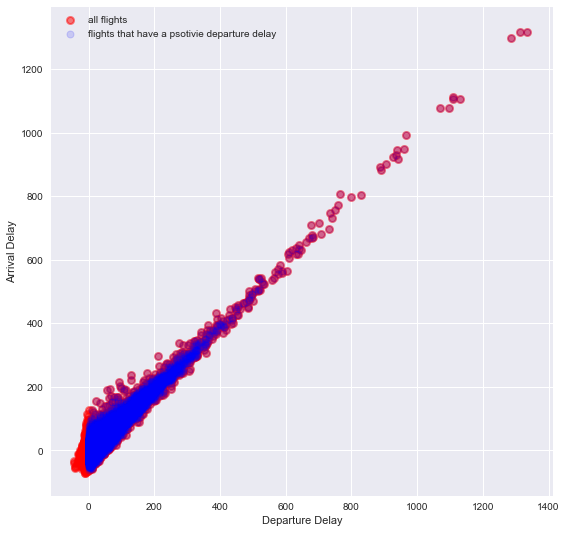

In [13]:
plt.rcParams["figure.figsize"] = (9, 9)
plt.scatter(x="DEP_DELAY", y="ARR_DELAY", data=flights, linewidths=2, alpha=0.5, c="r")
plt.scatter(x="DEP_DELAY", y="ARR_DELAY", data=pdd_flights, linewidths=1, alpha=0.15, c="b")
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.legend(labels=["all flights","flights that have a psotivie departure delay"])